In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score
import warnings

In [2]:
victoria = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Victoria.csv') 
victoria.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2018-04-10,34.44,57.58,40.34,2.23,25.91,1.00,35.78,29.56,57.58,Satisfactory
1,2018-04-11,27.44,49.77,41.72,3.27,21.12,0.96,28.78,29.98,52.15,Satisfactory
2,2018-04-12,21.49,43.30,40.85,3.58,2.76,0.76,42.79,30.19,51.06,Satisfactory
3,2018-04-13,23.07,45.91,29.53,3.84,2.04,0.98,41.80,30.29,49.00,Good
4,2018-04-14,21.27,42.23,27.35,4.17,1.68,0.97,44.96,30.34,48.50,Good


In [3]:
victoria['Date'] = pd.to_datetime(victoria['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
victoria["month"] = victoria["Date"].dt.month
victoria["week"] = victoria["Date"].dt.strftime('%V').astype('int64')
victoria["week_day"] = victoria["Date"].dt.weekday
victoria.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2018-04-10,34.44,57.58,40.34,2.23,25.91,1.00,35.78,29.56,57.58,Satisfactory,4,15,1
1,2018-04-11,27.44,49.77,41.72,3.27,21.12,0.96,28.78,29.98,52.15,Satisfactory,4,15,2
2,2018-04-12,21.49,43.30,40.85,3.58,2.76,0.76,42.79,30.19,51.06,Satisfactory,4,15,3
3,2018-04-13,23.07,45.91,29.53,3.84,2.04,0.98,41.80,30.29,49.00,Good,4,15,4
4,2018-04-14,21.27,42.23,27.35,4.17,1.68,0.97,44.96,30.34,48.50,Good,4,15,5


In [4]:
victoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1733 non-null   datetime64[ns]
 1   PM2.5         1733 non-null   float64       
 2   PM10          1733 non-null   float64       
 3   NO2           1733 non-null   float64       
 4   NH3           1733 non-null   float64       
 5   SO2           1733 non-null   float64       
 6   CO            1733 non-null   float64       
 7   Ozone         1733 non-null   float64       
 8   AT            1733 non-null   float64       
 9   AQI           1733 non-null   float64       
 10  AQI_Standard  1733 non-null   object        
 11  month         1733 non-null   int64         
 12  week          1733 non-null   int64         
 13  week_day      1733 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 189.7+ KB


## KNN Regression

In [5]:
model_knn = KNeighborsRegressor(n_neighbors=5)

### PM 2.5

In [6]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = victoria["month"]
data_pm25["week"] = victoria["week"]
data_pm25["week_day"] = victoria["week_day"]
data_pm25["PM2.5"] = victoria["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,4,15,1,34.44
1,4,15,2,27.44
2,4,15,3,21.49
3,4,15,4,23.07
4,4,15,5,21.27


In [7]:
# shuffling the data set
data_pm25 = data_pm25.sample(frac=1).reset_index()
data_pm25 = data_pm25.drop('index', axis=1)
data_pm25.head()

,month,week,week_day,PM2.5
0,8,35,3,8.82
1,11,46,5,76.38
2,6,22,2,39.18
3,6,24,4,14.63
4,5,20,3,0.72


In [8]:
duplicate_pm25 = data_pm25.copy()

In [9]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [10]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
X_pm25.shape

(1733, 3)

In [11]:
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)
y_pm25.shape      

(1733, 1)

In [12]:
X_train = X_pm25.head(1386)
X_test = X_pm25.tail(347)
y_train = y_pm25.head(1386)
y_test = y_pm25.tail(347)

In [13]:
victoria_pm25_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [14]:
predictions_pm25 = victoria_pm25_knn.predict(X_test)

In [15]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9979847304607767


In [16]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(347,1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.01198
dtype: float64

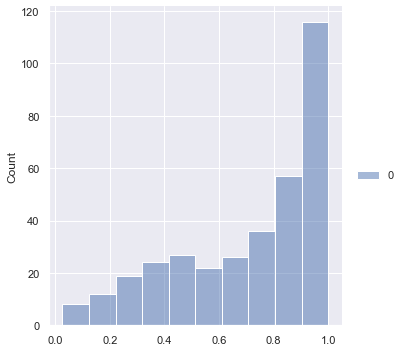

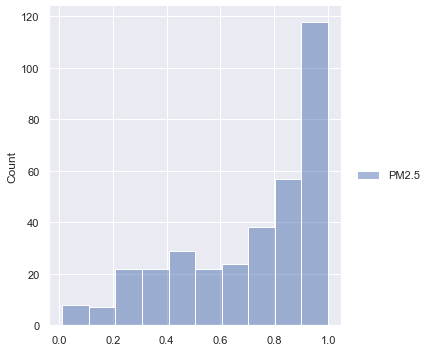

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

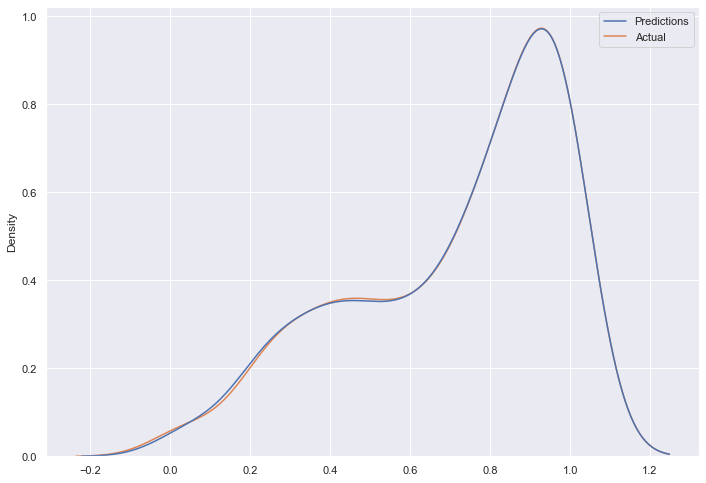

In [18]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [19]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = victoria["month"]
data_pm10["week"] = victoria["week"]
data_pm10["week_day"] = victoria["week_day"]
data_pm10["PM10"] = victoria["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,4,15,1,57.58
1,4,15,2,49.77
2,4,15,3,43.30
3,4,15,4,45.91
4,4,15,5,42.23


In [20]:
# shuffling the data set
data_pm10 = data_pm10.sample(frac=1).reset_index()
data_pm10 = data_pm10.drop('index', axis=1)
data_pm10.head()

,month,week,week_day,PM10
0,12,52,3,191.13
1,7,30,6,34.78
2,3,11,2,206.05
3,10,41,6,80.93
4,9,37,5,36.38


In [21]:
duplicate_pm10 = data_pm10.copy()

In [22]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [23]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [24]:
X_train = X_pm10.head(1386)
X_test = X_pm10.tail(347)
y_train = y_pm10.head(1386)
y_test = y_pm10.tail(347)

In [25]:
victoria_pm10_model_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [26]:
predictions_pm10 = victoria_pm10_model_knn.predict(X_test)

In [27]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.9974575900045279


In [28]:
predictions_pm10.shape

(347,)

In [29]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(347,1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.010231
dtype: float64

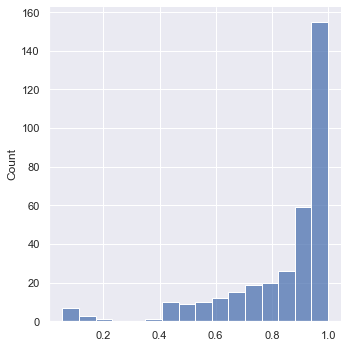

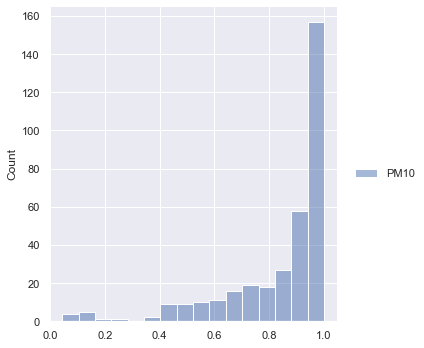

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

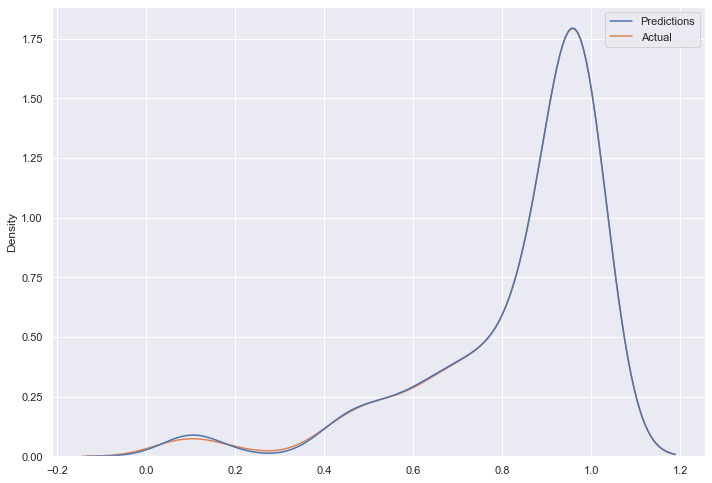

In [31]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [32]:
data_no2 = pd.DataFrame()
data_no2["month"] = victoria["month"]
data_no2["week"] = victoria["week"]
data_no2["week_day"] = victoria["week_day"]
data_no2["NO2"] = victoria["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,4,15,1,40.34
1,4,15,2,41.72
2,4,15,3,40.85
3,4,15,4,29.53
4,4,15,5,27.35


In [33]:
# shuffling the data set
data_no2 = data_no2.sample(frac=1).reset_index()
data_no2 = data_no2.drop('index', axis=1)
data_no2.head()

,month,week,week_day,NO2
0,9,39,0,11.19
1,3,13,2,63.08
2,8,32,5,3.38
3,11,44,6,29.88
4,4,16,4,29.26


In [34]:
duplicate_no2 = data_no2.copy()

In [35]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [36]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [37]:
X_train = X_no2.head(1386)
X_test = X_no2.tail(347)
y_train = y_no2.head(1386)
y_test = y_no2.tail(347)

In [38]:
victoria_no2_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [39]:
predictions_no2 = victoria_no2_knn.predict(X_test)

In [40]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9972615121722981


In [41]:
predictions_no2.shape

(347,)

In [42]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(347,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.016132
dtype: float64

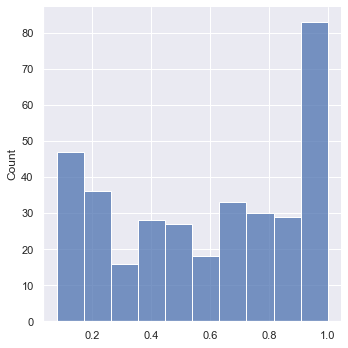

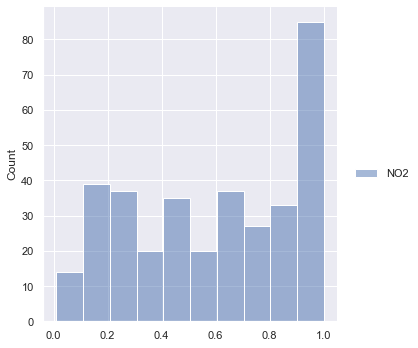

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

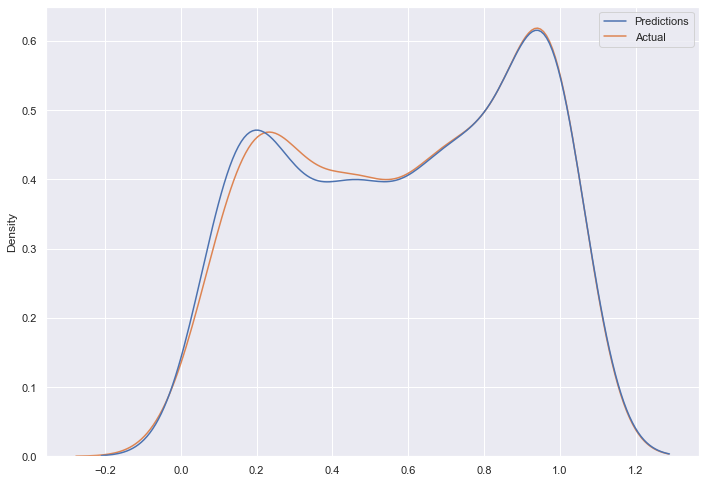

In [44]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [45]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = victoria["month"]
data_nh3["week"] = victoria["week"]
data_nh3["week_day"] = victoria["week_day"]
data_nh3["NH3"] = victoria["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,4,15,1,2.23
1,4,15,2,3.27
2,4,15,3,3.58
3,4,15,4,3.84
4,4,15,5,4.17


In [46]:
# shuffling the data set
data_nh3 = data_nh3.sample(frac=1).reset_index()
data_nh3 = data_nh3.drop('index', axis=1)
data_nh3.head()

,month,week,week_day,NH3
0,12,51,1,50.77
1,1,3,2,16.25
2,11,44,6,75.83
3,4,15,2,72.25
4,12,51,0,16.41


In [47]:
duplicate_nh3 = data_nh3.copy()

In [48]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [49]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [50]:
X_train = X_nh3.head(1386)
X_test = X_nh3.tail(347)
y_train = y_nh3.head(1386)
y_test = y_nh3.tail(347)

In [51]:
victoria_nh3_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [52]:
predictions_nh3 = victoria_nh3_knn.predict(X_test)

In [53]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9985370296064046


In [54]:
predictions_nh3.shape

(347,)

In [55]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(347,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.012099
dtype: float64

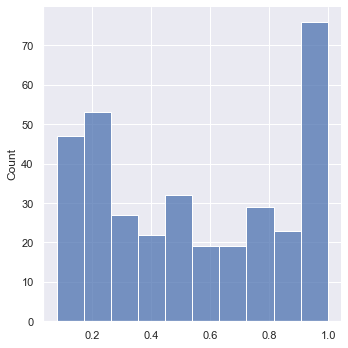

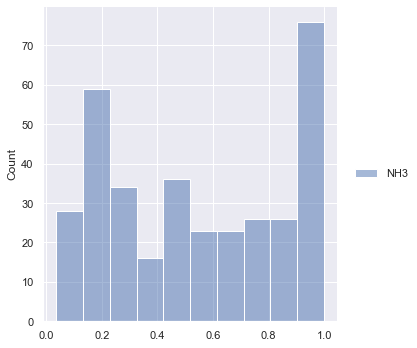

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

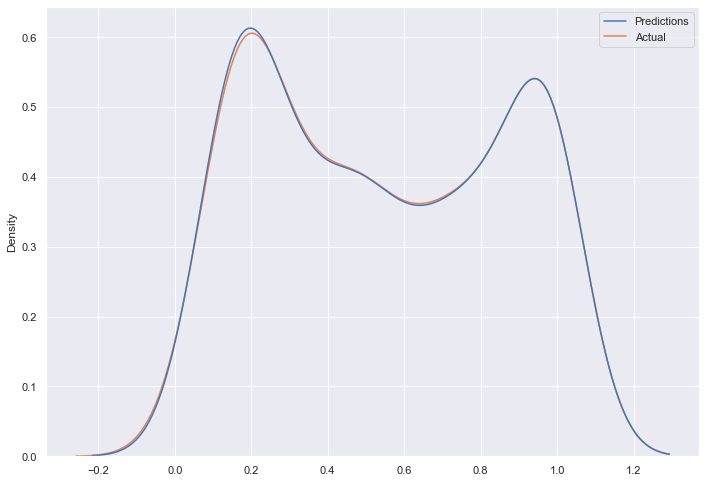

In [57]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [58]:
data_so2 = pd.DataFrame()
data_so2["month"] = victoria["month"]
data_so2["week"] = victoria["week"]
data_so2["week_day"] = victoria["week_day"]
data_so2["SO2"] = victoria["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,4,15,1,25.91
1,4,15,2,21.12
2,4,15,3,2.76
3,4,15,4,2.04
4,4,15,5,1.68


In [59]:
# shuffling the data set
data_so2 = data_so2.sample(frac=1).reset_index()
data_so2 = data_so2.drop('index', axis=1)
data_so2.head()

,month,week,week_day,SO2
0,10,44,0,9.96
1,9,37,5,3.37
2,3,9,5,9.93
3,4,16,5,13.60
4,8,35,1,8.90


In [60]:
duplicate_so2 = data_so2.copy()

In [61]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [62]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [63]:
X_train = X_so2.head(1386)
X_test = X_so2.tail(347)
y_train = y_so2.head(1386)
y_test = y_so2.tail(347)

In [64]:
victoria_so2_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [65]:
predictions_so2 = victoria_so2_knn.predict(X_test)

In [66]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9959250559522473


In [67]:
predictions_so2.shape

(347,)

In [68]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(347,1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.01798
dtype: float64

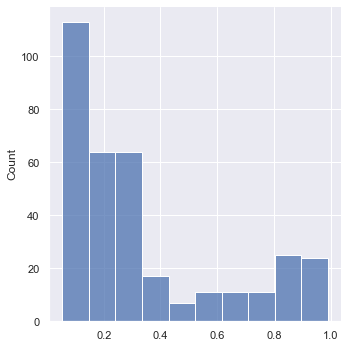

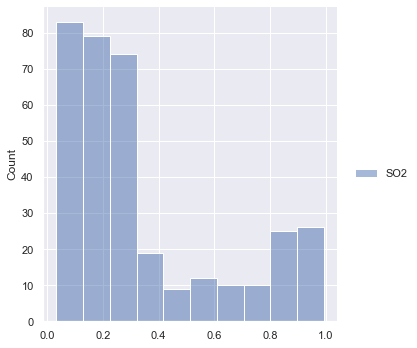

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

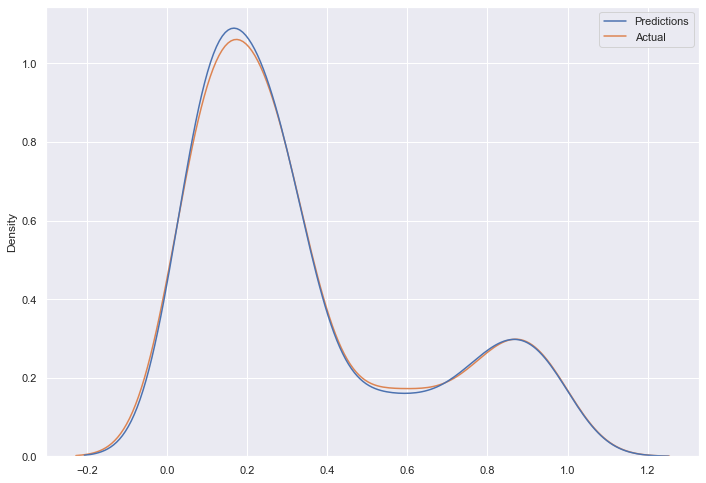

In [70]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [71]:
data_co = pd.DataFrame()
data_co["month"] = victoria["month"]
data_co["week"] = victoria["week"]
data_co["week_day"] = victoria["week_day"]
data_co["CO"] = victoria["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,4,15,1,1.00
1,4,15,2,0.96
2,4,15,3,0.76
3,4,15,4,0.98
4,4,15,5,0.97


In [72]:
# shuffling the data set
data_co = data_co.sample(frac=1).reset_index()
data_co = data_co.drop('index', axis=1)
data_co.head()

,month,week,week_day,CO
0,1,1,0,1.12
1,10,44,3,2.05
2,5,21,2,0.77
3,1,1,3,2.38
4,12,52,4,1.47


In [73]:
duplicate_co = data_co.copy()

In [74]:
#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)

In [75]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [76]:
X_train = X_co.head(1386)
X_test = X_co.tail(347)
y_train = y_co.head(1386)
y_test = y_co.tail(347)

In [77]:
victoria_co_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [78]:
predictions_co = victoria_co_knn.predict(X_test)

In [79]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.8096558873643812


In [80]:
predictions_so2.shape

(347,)

In [81]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(347,1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.408314
dtype: float64

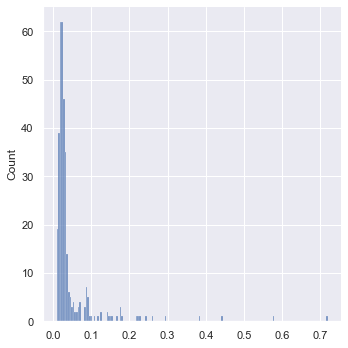

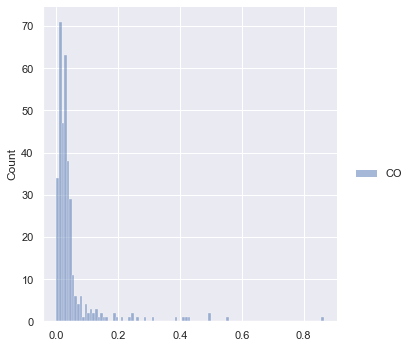

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

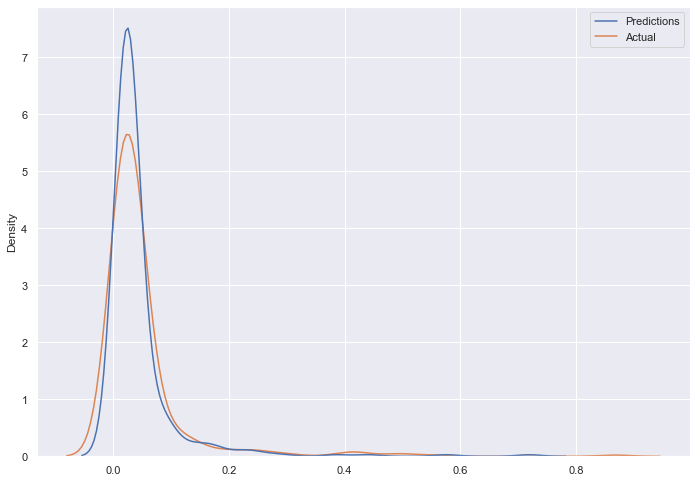

In [83]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [84]:
data_ozone = pd.DataFrame()
data_ozone["month"] = victoria["month"]
data_ozone["week"] = victoria["week"]
data_ozone["week_day"] = victoria["week_day"]
data_ozone["Ozone"] = victoria["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,4,15,1,35.78
1,4,15,2,28.78
2,4,15,3,42.79
3,4,15,4,41.80
4,4,15,5,44.96


In [85]:
# shuffling the data set
data_ozone = data_ozone.sample(frac=1).reset_index()
data_ozone = data_ozone.drop('index', axis=1)
data_ozone.head()

,month,week,week_day,Ozone
0,10,44,0,21.94
1,3,11,3,49.80
2,12,51,5,40.82
3,3,10,2,51.40
4,7,27,5,38.83


In [86]:
duplicate_ozone = data_ozone.copy()

In [87]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [88]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [89]:
X_train = X_o3.head(1386)
X_test = X_o3.tail(347)
y_train = y_o3.head(1386)
y_test = y_o3.tail(347)

In [90]:
victoria_ozone_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [91]:
predictions_ozone = victoria_ozone_knn.predict(X_test)

In [92]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9949930991270455


In [93]:
predictions_ozone.shape

(347,)

In [94]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(347,1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.015361
dtype: float64

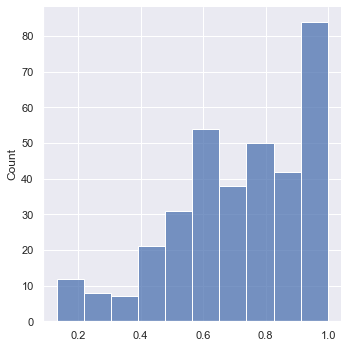

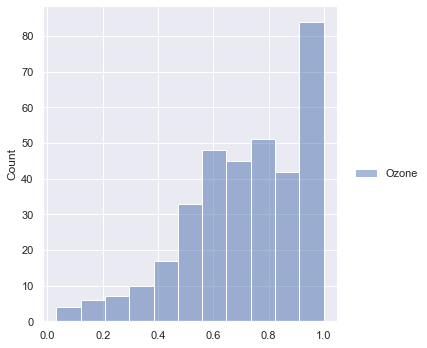

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

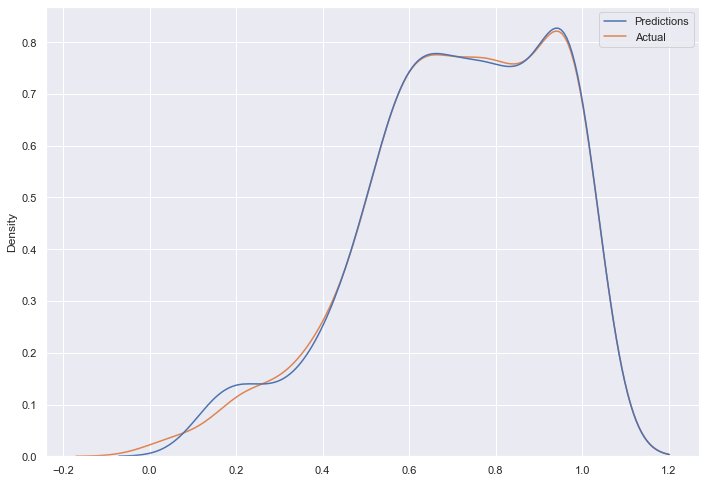

In [96]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### AQI

In [97]:
data_aqi = pd.DataFrame()
data_aqi["month"] = victoria["month"]
data_aqi["week"] = victoria["week"]
data_aqi["week_day"] = victoria["week_day"]
data_aqi["AQI"] = victoria["AQI"]
cols = data_aqi.columns
data_aqi.head()

,month,week,week_day,AQI
0,4,15,1,57.58
1,4,15,2,52.15
2,4,15,3,51.06
3,4,15,4,49.00
4,4,15,5,48.50


In [98]:
# shuffling the data set
data_aqi = data_aqi.sample(frac=1).reset_index()
data_aqi = data_aqi.drop('index', axis=1)
data_aqi.head()

,month,week,week_day,AQI
0,2,8,4,179.43
1,2,7,6,220.47
2,7,30,1,38.96
3,12,52,5,315.85
4,1,5,4,166.37


In [99]:
duplicate_aqi = data_aqi.copy()

In [100]:
#normalizing the dataset
data_aqi = preprocessing.normalize(data_aqi,norm='l2')
data_aqi = pd.DataFrame(data_aqi, columns=cols)

In [101]:
X_aqi = data_aqi.drop('AQI', axis=1) #data basically refere to the values in the independent columns
y_aqi = data_aqi.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [102]:
X_train = X_aqi.head(1386)
X_test = X_aqi.tail(347)
y_train = y_aqi.head(1386)
y_test = y_aqi.tail(347)

In [103]:
victoria_aqi_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [104]:
predictions_aqi = victoria_aqi_knn.predict(X_test)

In [105]:
r2 = r2_score(y_test, predictions_aqi)
print('r2 score for   model is', r2)

r2 score for   model is 0.9980677164909163


In [106]:
predictions_aqi.shape

(347,)

In [107]:
predictions3 = predictions_aqi.reshape(347,1)
np.sqrt(((predictions3 - y_test)**2).mean())

AQI    0.005495
dtype: float64

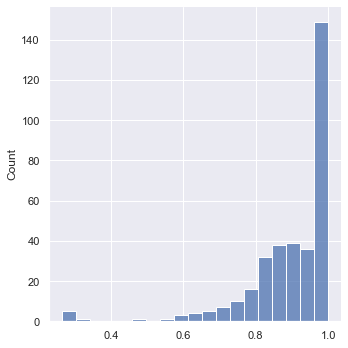

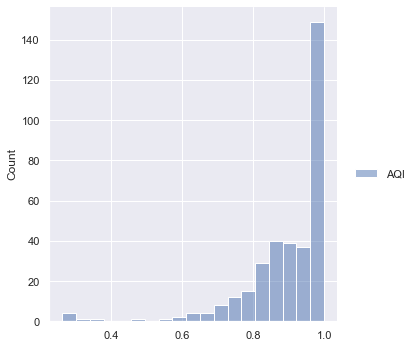

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_aqi)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

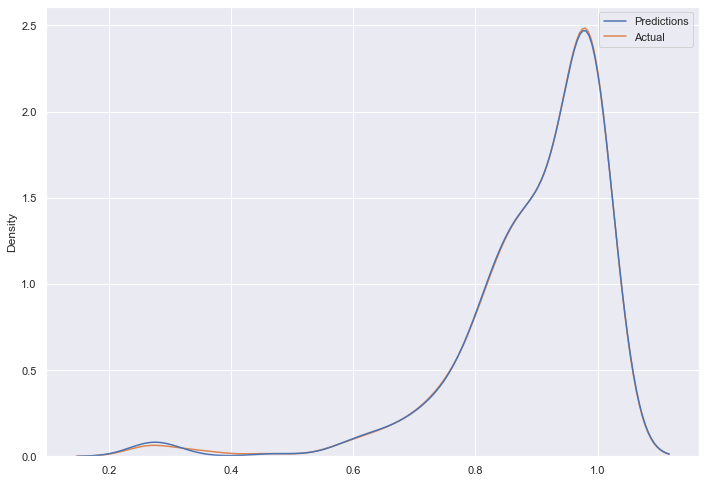

In [109]:
results = pd.DataFrame(predictions_aqi, columns = ['Predictions'])
results["Actual"] = list(y_test["AQI"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [110]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [111]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [112]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [113]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [114]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],victoria_pm25_knn,victoria_pm10_model_knn,victoria_no2_knn,victoria_nh3_knn,victoria_so2_knn,victoria_co_knn,victoria_ozone_knn,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [24.49516734]
PM 10: [49.47336544]
NO2: [25.68277631]
NH3: [10.36149935]
SO2: [10.13892445]
CO: [0.26650262]
O3: [20.95137636]

The AQI value is expected to be around 49.47 and the index is expected to be Good
